In [ ]:
import pandas as pd #used for data manipulation 

In [ ]:
import numpy as np #used for numerical analysis

In [ ]:
from collections import Counter as c # return counts of number of classess

In [ ]:
import matplotlib.pyplot as plt #used for data visualization 

In [ ]:
import seaborn as sns #data visualization librory

In [ ]:
import missingno as msno #finding missing values

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix#model performance

In [ ]:
from sklearn.model_selection import train_test_split #splics data in randam train and test array

In [ ]:
from sklearn.preprocessing import LabelEncoder #encoding the levels of categotical features 

In [ ]:
from sklearn.linear_model import LogisticRegression #classification ML algorithm

In [ ]:
import pickle #python object hierarchy is converted into a byte stream,

In [ ]:
data = pd.read_csv(r"/content/kidney_disease.csv") #loading the csv data

In [ ]:
data.head() #return you the first 5 rows values

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
data.columns #return all the column names

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns# rename column names to make it more user-friendly



Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.shape
data.drop('id', axis = 1, inplace = True)


In [ ]:
data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
#extracting numaric and categorical data 

num_cols = [col for col in data.columns if data[col].dtype != 'object']
cat_cols = [col for col in data.columns if data[col].dtype == 'object']


In [ ]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin']

In [ ]:
#####check unique values in the categorical data 

for col in cat_cols:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '

In [ ]:
#####to handel the skewness in the data 
def handel_outlier(col):
    data[col] =np.log1p(data[col])


In [ ]:
handel_outlier('blood_urea')
handel_outlier('sodium')
handel_outlier('potassium')
handel_outlier('serum_creatinine')
handel_outlier('sugar')

In [ ]:
##that explins why soe data still skeness although we to process on it  , becaus it stil has null data 
data.isna().sum()


age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [ ]:
#filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values
def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature] =random_sample
    
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] =data[feature].fillna(mode)


In [ ]:
###filling num columns null values uysing rando sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
data[num_cols].isnull().sum()


age                     0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
haemoglobin             0
dtype: int64

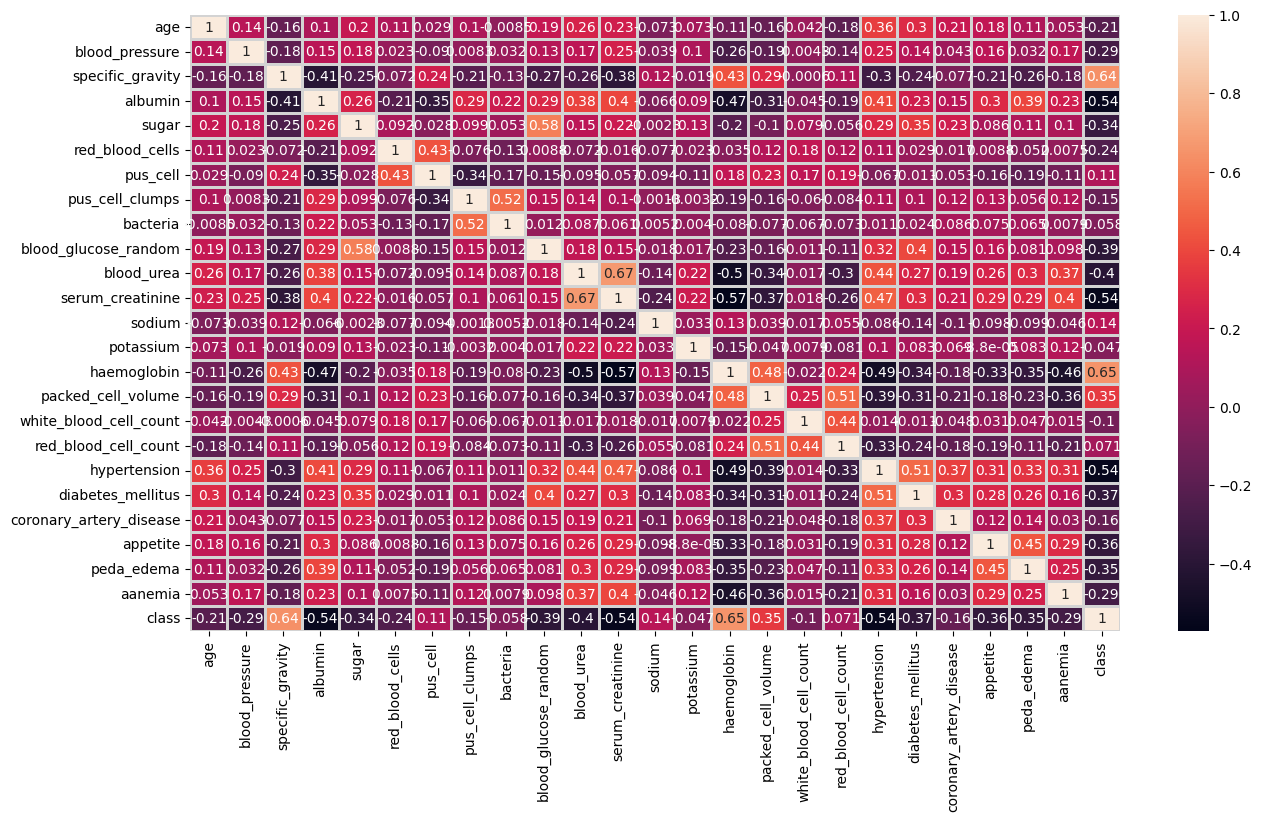

In [ ]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


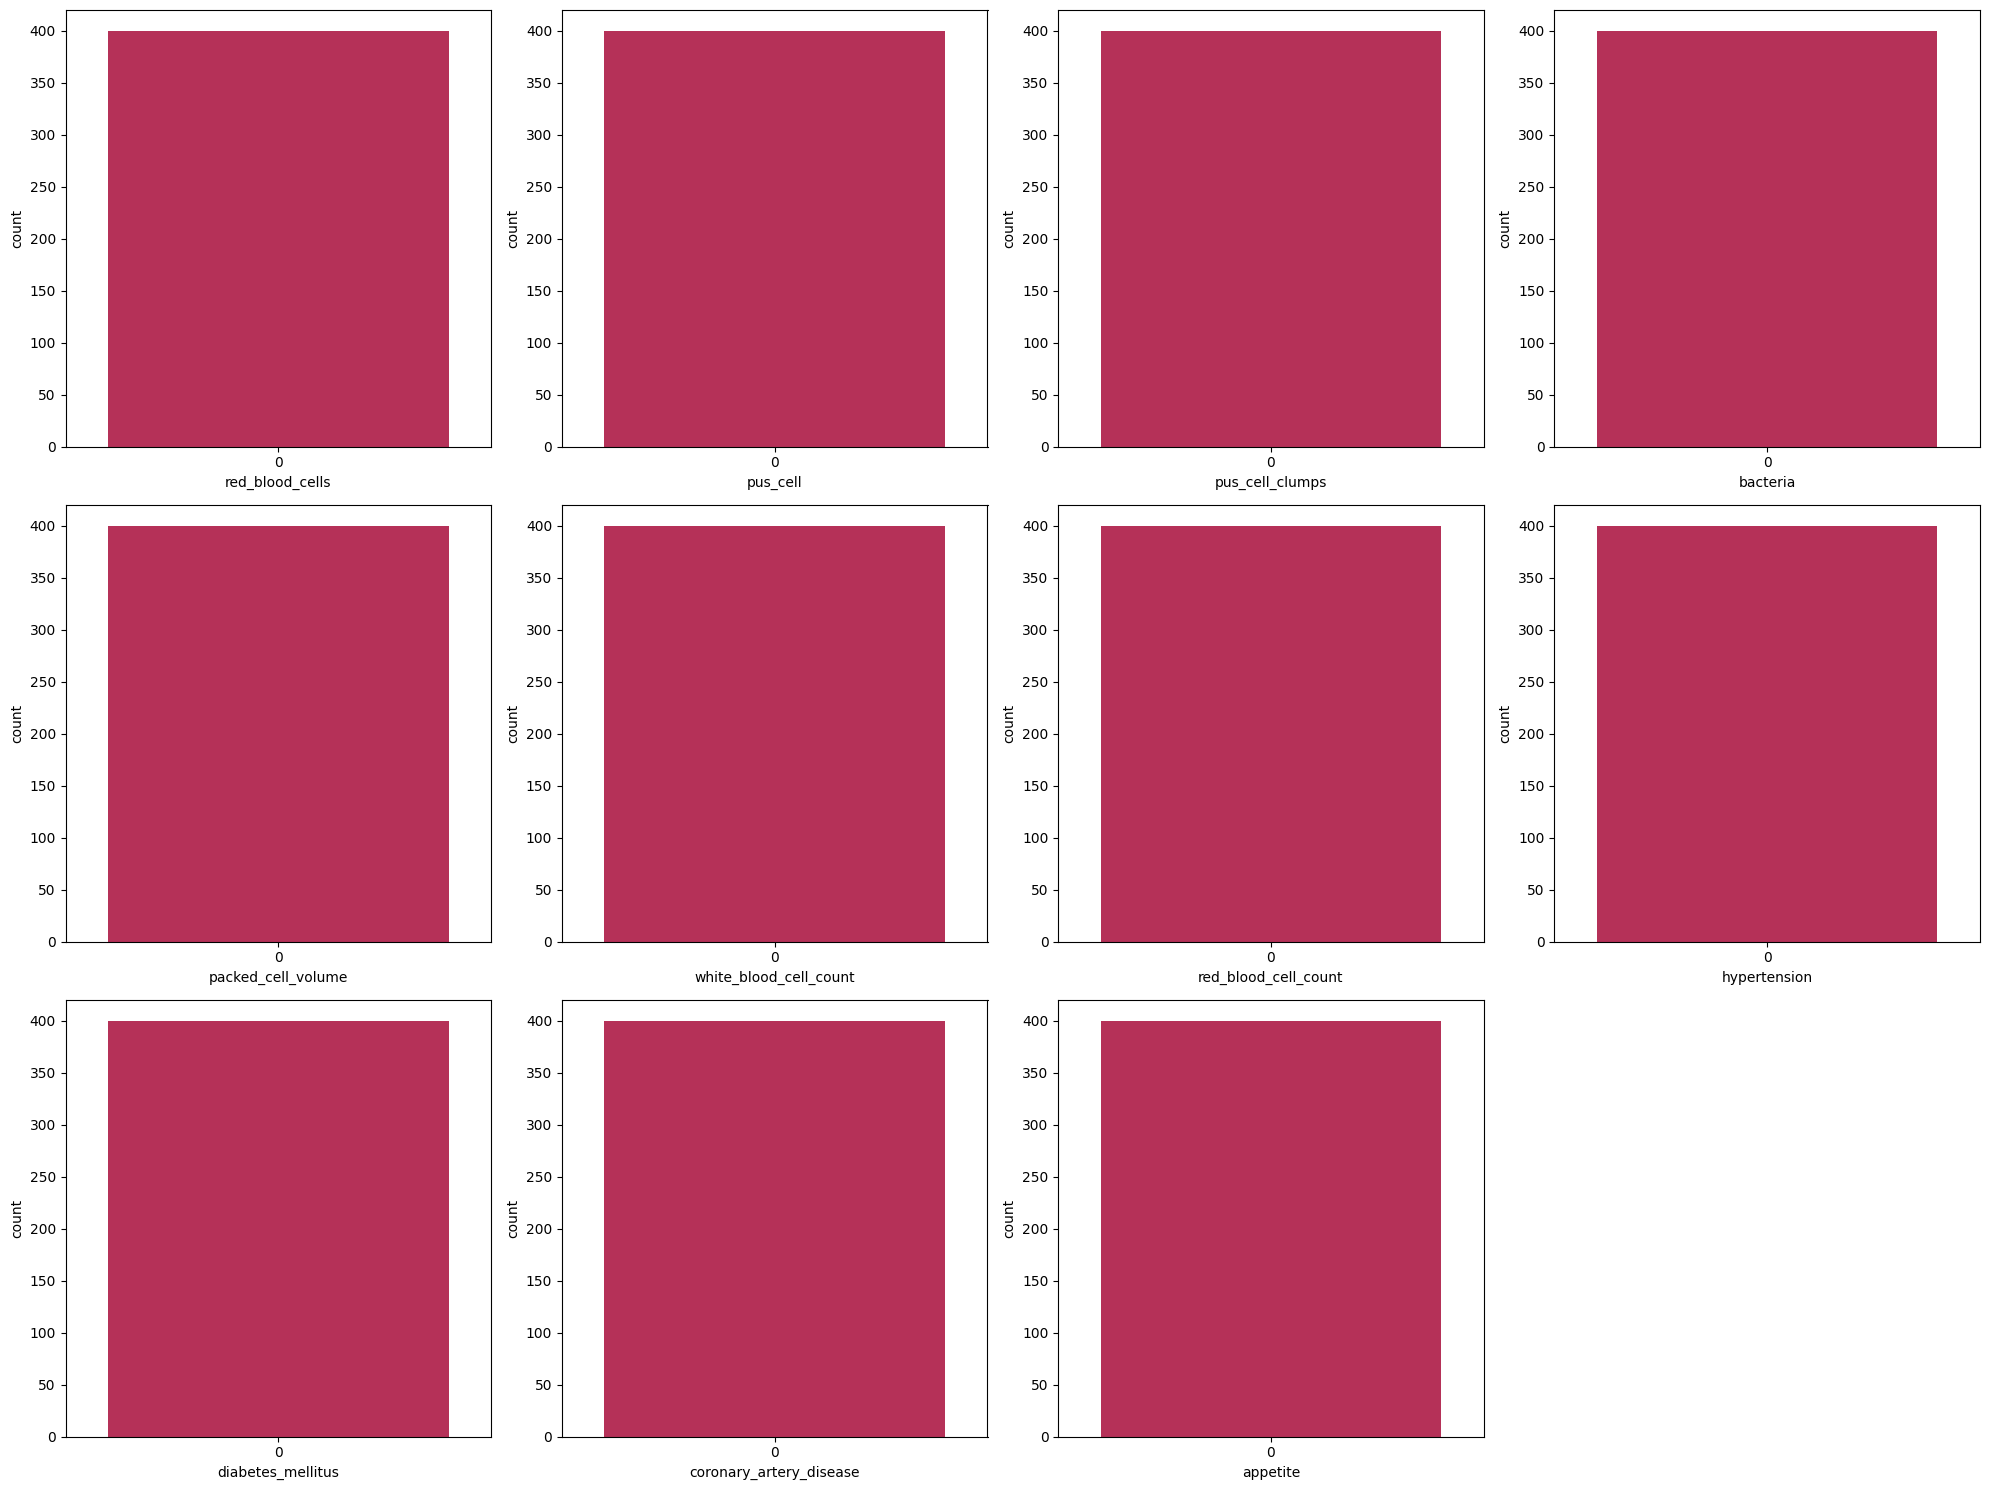

In [ ]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [ ]:
# checking for null values

data.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

<ipython-input-40-59a0f9abaa9a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-40-59a0f9abaa9a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-40-59a0f9abaa9a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed 

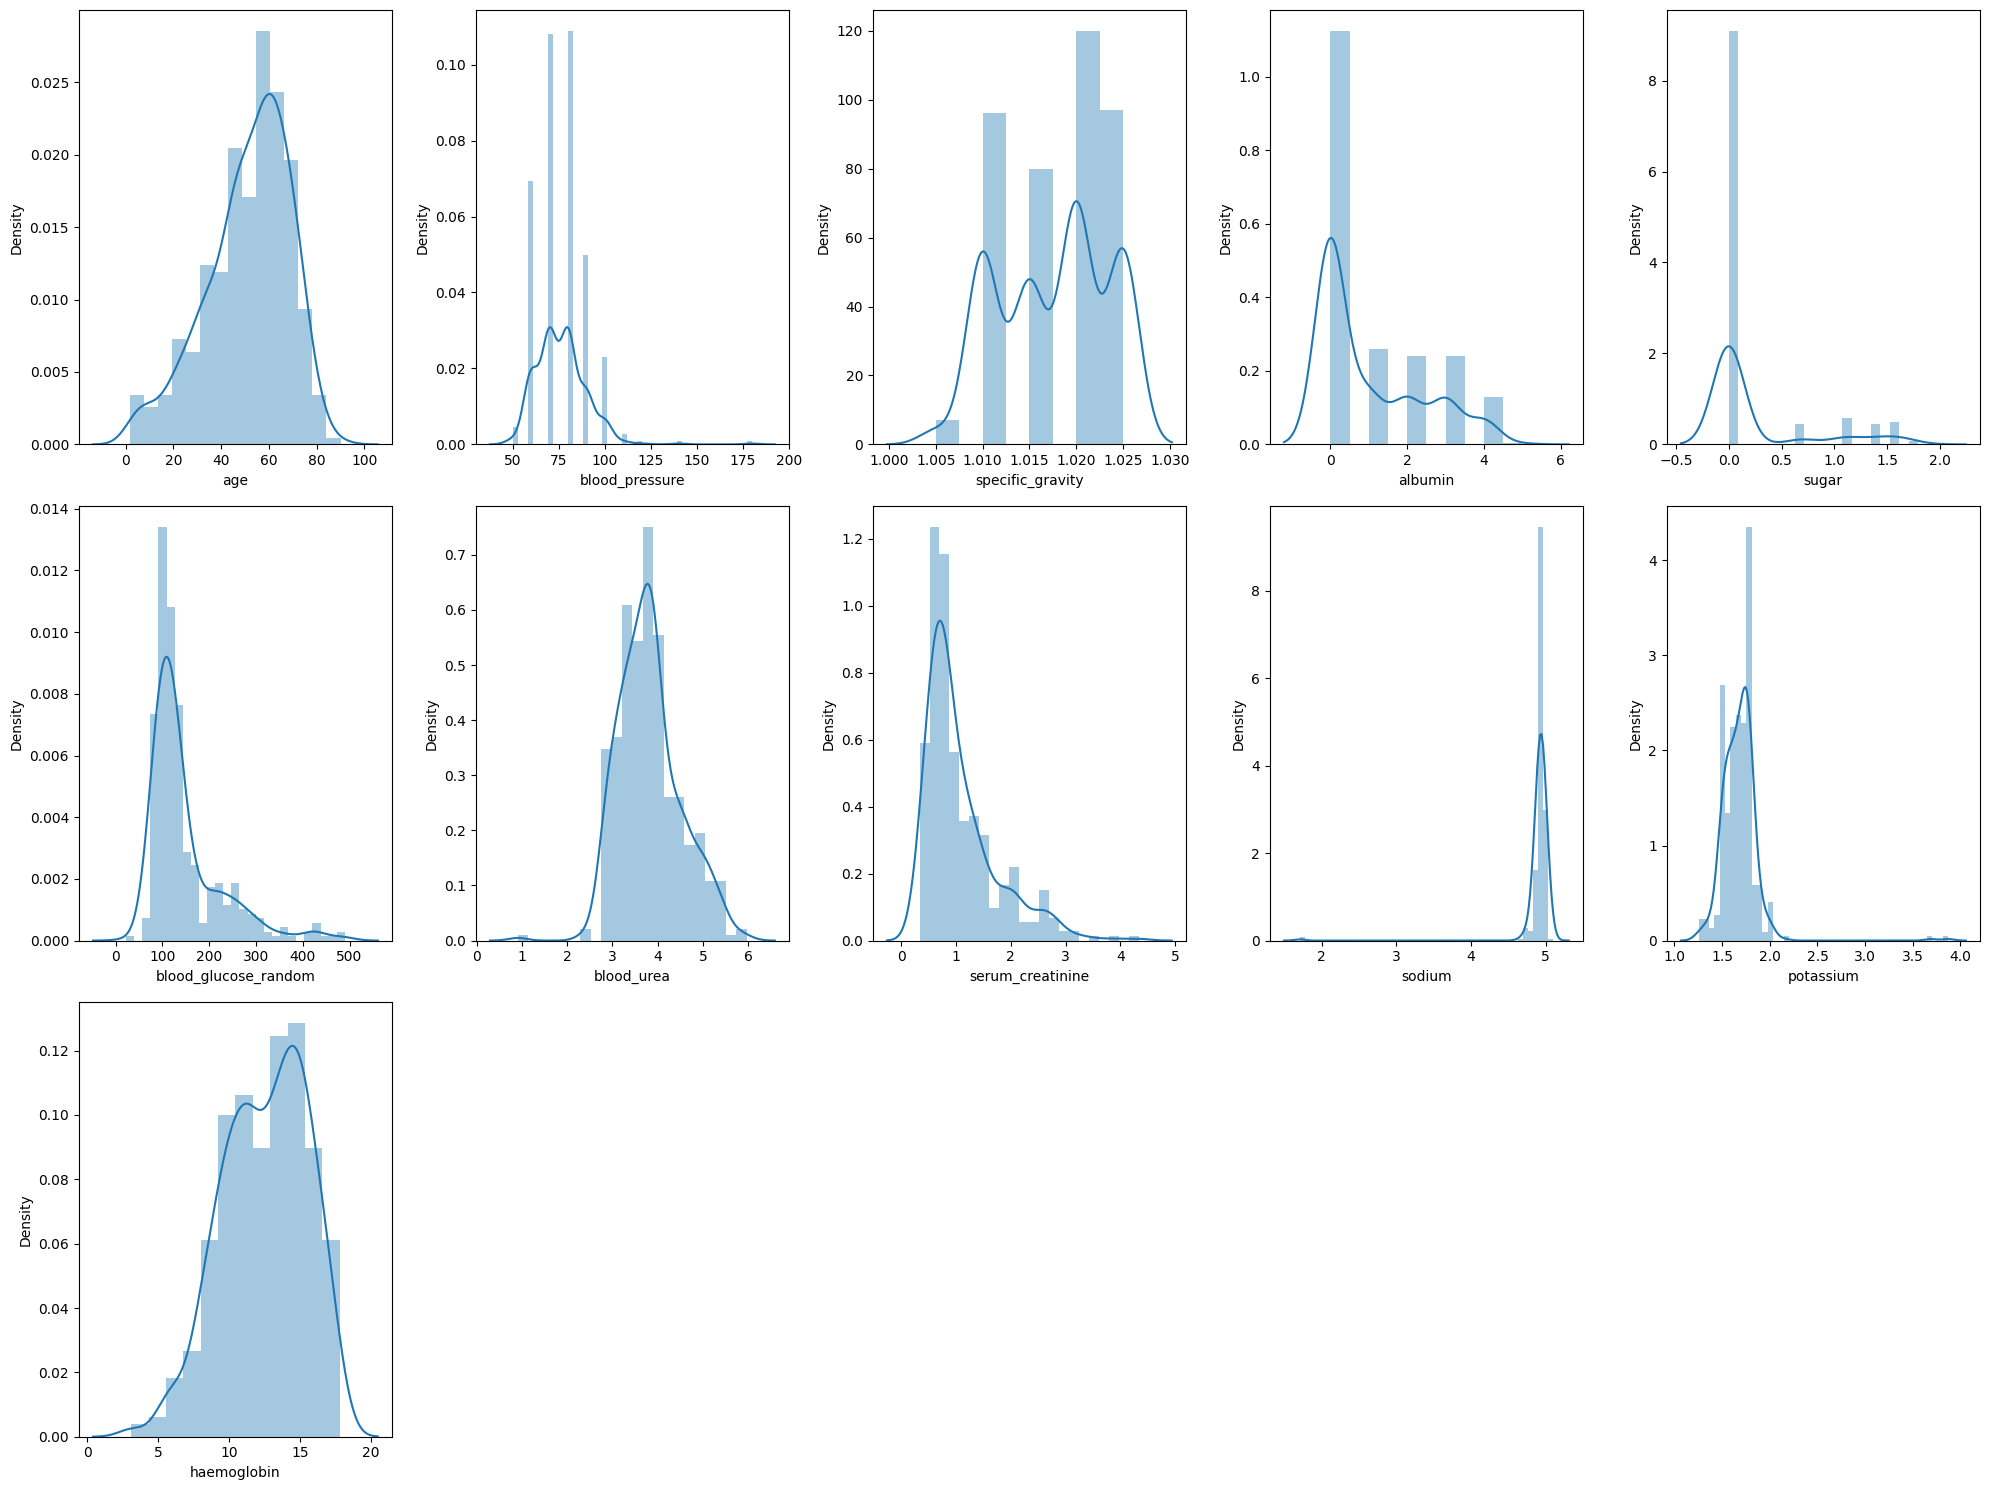

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
for col in cat_cols:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [2 1 0] values

pus_cell has [1 0 2] values

pus_cell_clumps has [0 1 2] values

bacteria has [0 1 2] values

packed_cell_volume has [32 26 19 20 23 27 24 21 17 16 44  4 12 25 18 22 28 33 15 36  1 40  2 10
  6 30  5 34 11  7 13 29 14  3  9 31  8  0 35 43 37 38 41 39 42] values

white_blood_cell_count has [72 56 70 62 68 92 64 88 18 43 19 10 39 13 49 84 57 77 78  4 90 83 73 59
 80 33 35 42 79 12 67 71 27 58  0 66 15 86 51 54 25 22 52 65 16  5  7 23
 63 60 26  3 82 28 76 29 46 31 21  1  6 41 44  9 75 87 36 24 11 34  2 20
 32 37 38 81 69 45 74 17 30 40 53 14 50  8 91 48 55 85 89 47 61] values

red_blood_cell_count has [34 49 19 27 25 31 21 17 18 14  5  7 24 12 16 20 22 30  4 23 26 11 28 15
 42 32  1 38  2  8  6 48 13 10  9  3 29  0 36 43 44 45 33 40 37 35 46 39
 41 47] values

hypertension has [1 0 2] values

diabetes_mellitus has [4 3 2 0 1 5] values

coronary_artery_disease has [1 2 0 3] values

appetite has [0 1 2] values

peda_edema has [0 1 2] values

aanemia has 

In [ ]:
data.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  400.000000       400.00000        400.000000  400.000000  400.000000   
mean    51.385000        76.27500          1.017550    1.002500    0.226718   
std     17.265631        13.61388          0.005752    1.338646    0.499318   
min      2.000000        50.00000          1.005000    0.000000    0.000000   
25%     42.000000        70.00000          1.010000    0.000000    0.000000   
50%     55.000000        80.00000          1.020000    0.000000    0.000000   
75%     64.250000        80.00000          1.020000    2.000000    0.000000   
max     90.000000       180.00000          1.025000    5.000000    1.791759   

       red_blood_cells    pus_cell  pus_cell_clumps    bacteria  \
count       400.000000  400.000000       400.000000  400.000000   
mean          1.262500    0.972500         0.125000    0.075000   
std           0.655491    0.593823         0.360138    0.299331   
min           0.000000    0.000000         0.000000    0.000000   
25%           1.000000    1.000000         0.000000    0.000000   
50%           1.000000    1.000000         0.000000    0.000000   
75%           2.000000    1.000000         0.000000    0.000000   
max           2.000000    2.000000         2.000000    2.000000   

       blood_glucose_random  ...  packed_cell_volume  white_blood_cell_count  \
count            400.000000  ...          400.000000               400.00000   
mean             147.207500  ...           29.852500                64.43000   
std               77.858875  ...           10.529145                28.14962   
min               22.000000  ...            0.000000                 0.00000   
25%               99.000000  ...           22.000000                49.00000   
50%              120.500000  ...           30.000000                71.00000   
75%              163.000000  ...           39.250000                92.00000   
max              490.000000  ...           44.000000                92.00000   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
count            400.000000    400.000000         400.000000   
mean              34.837500      0.377500           3.310000   
std               13.397381      0.495588           0.591417   
min                0.000000      0.000000           0.000000   
25%               26.000000      0.000000           3.000000   
50%               36.000000      0.000000           3.000000   
75%               49.000000      1.000000           4.000000   
max               49.000000      2.000000           5.000000   

       coronary_artery_disease    appetite  peda_edema    aanemia       class  
count               400.000000  400.000000  400.000000  400.00000  400.000000  
mean                  1.090000    0.210000    0.195000    0.15500    0.755000  
std                   0.319618    0.413918    0.402965    0.36921    0.968152  
min                   0.000000    0.000000    0.000000    0.00000    0.000000  
25%                   1.000000    0.000000    0.000000    0.00000    0.000000  
50%                   1.000000    0.000000    0.000000    0.00000    0.000000  
75%                   1.000000    0.000000    0.000000    0.00000    2.000000  
max                   3.000000    2.000000    2.000000    2.00000    2.000000  

[8 rows x 25 columns]

In [1]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! jupyter nbconvert --to html.

[NbConvertApp] WARNING | pattern 'spam.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execut